In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Activation functions and derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - x**2

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

# ANN training function
def train_ann(X, y, hidden_neurons=8, activation='sigmoid', epochs=1000, lr=0.01):
    input_dim, output_dim = X.shape[1], y.shape[1]
    w1 = np.random.randn(input_dim, hidden_neurons)
    w2 = np.random.randn(hidden_neurons, output_dim)
    b1 = np.zeros((1, hidden_neurons))
    b2 = np.zeros((1, output_dim))

    if activation == 'sigmoid':
        act = sigmoid
        act_deriv = sigmoid_derivative
    elif activation == 'tanh':
        act = tanh
        act_deriv = tanh_derivative
    elif activation == 'relu':
        act = relu
        act_deriv = relu_derivative

    loss_history = []

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, w1) + b1
        a1 = act(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)  # Output layer uses sigmoid

        # Compute loss (MSE)
        loss = np.mean((y - a2)**2)
        loss_history.append(loss)

        # Backward pass
        error = a2 - y
        d2 = error * sigmoid_derivative(a2)
        d1 = np.dot(d2, w2.T) * act_deriv(a1)

        # Update weights and biases
        w2 -= lr * np.dot(a1.T, d2)
        b2 -= lr * np.sum(d2, axis=0, keepdims=True)
        w1 -= lr * np.dot(X.T, d1)
        b1 -= lr * np.sum(d1, axis=0, keepdims=True)

    # Return trained model and loss history
    model = lambda x: sigmoid(np.dot(act(np.dot(x, w1) + b1), w2) + b2)
    return model, loss_history


In [3]:
activations = ['sigmoid', 'tanh', 'relu']
results = {}
losses = {}

for act in activations:
    print(f"\nTraining with {act} activation...")
    model, loss_history = train_ann(X_train, y_train, activation=act)
    y_pred = model(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    acc = accuracy_score(y_true, y_pred_classes)
    results[act] = acc
    losses[act] = loss_history
    print(f"Test Accuracy using {act}: {acc:.4f}")



Training with sigmoid activation...
Test Accuracy using sigmoid: 1.0000

Training with tanh activation...
Test Accuracy using tanh: 1.0000

Training with relu activation...
Test Accuracy using relu: 1.0000


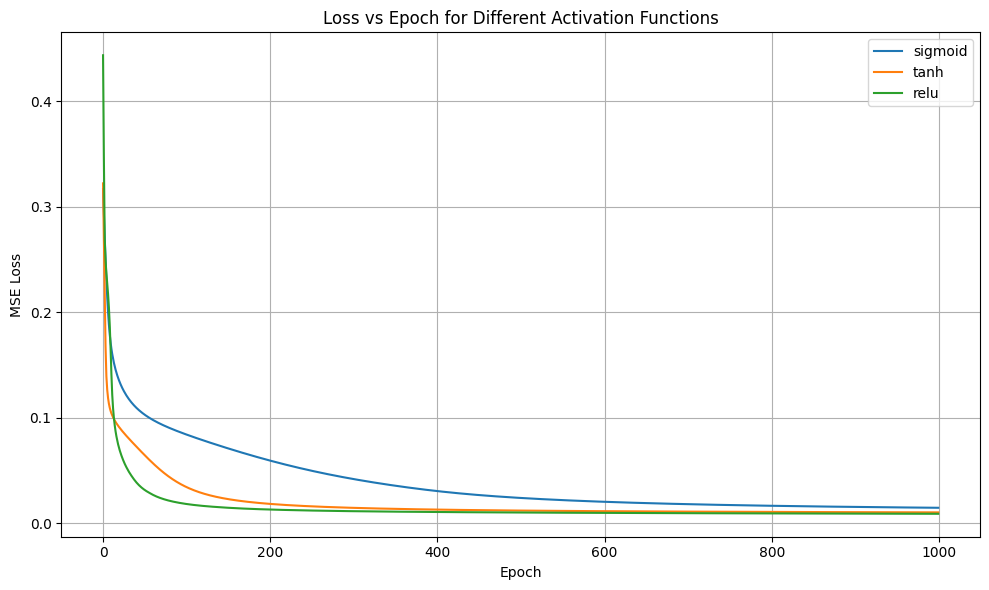

In [4]:
plt.figure(figsize=(10, 6))
for act in activations:
    plt.plot(losses[act], label=f"{act}")
plt.title("Loss vs Epoch for Different Activation Functions")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


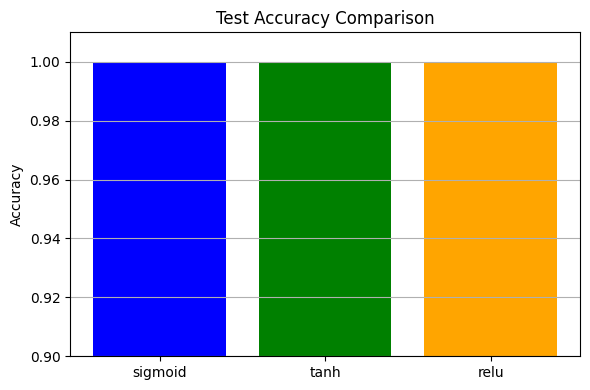

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(axis='y')
plt.tight_layout()
plt.show()